In [1]:
# Import the standard modules
import sqlite3

# Import the installed modules
import pandas as pd
import numpy as np

# Import matplotlib for plotting
from matplotlib import pyplot as plt

In [2]:
# Connect to the comet database. This database has been created in tutorial
# part 7, however, due to its small size the database is uploaded on GitHub
CON = sqlite3.connect('../_databases/_comets/mpc_comets.db')

# Create a pandas dataframe that contains the aphelion and inclination data
# for P type ...
P_TYPE_DF = pd.read_sql('SELECT APHELION_AU, INCLINATION_DEG ' \
                        'FROM comets_main WHERE ORBIT_TYPE="P"', CON)

# ... and C type comets. For this type: include also the eccentricity
C_TYPE_DF = pd.read_sql('SELECT APHELION_AU, INCLINATION_DEG, ECCENTRICITY ' \
                        'FROM comets_main WHERE ORBIT_TYPE="C"', CON)

In [3]:
# Print some descriptive statistics of the P type comets
print('Descriptive statistics of P comets')
print(f'{P_TYPE_DF.describe()}')
print('\n')

# Print some descriptive statistics of the C type comets (differentiate
# between bound (e<1) and un-bound (e>=1) comets)
print('Descriptive statistics of C comets with an eccentricity < 1')
print(f'{C_TYPE_DF.loc[C_TYPE_DF["ECCENTRICITY"]<1].describe()}')
print('\n')

print('Descriptive statistics of C comets with an eccentricity >= 1')
print(f'{C_TYPE_DF.loc[C_TYPE_DF["ECCENTRICITY"]>=1].describe()}')
print('\n')

Descriptive statistics of P comets
       APHELION_AU  INCLINATION_DEG
count   627.000000       627.000000
mean      7.793602        16.525725
std       6.567561        20.943154
min       2.440626         0.234800
25%       5.145018         7.088200
50%       5.929885        11.550400
75%       8.995666        18.868550
max     101.318552       172.527900


Descriptive statistics of C comets with an eccentricity < 1
         APHELION_AU  INCLINATION_DEG  ECCENTRICITY
count     159.000000       159.000000    159.000000
mean     4766.428836        76.079123      0.946816
std     20826.176153        44.847788      0.096976
min        15.260793         3.148100      0.428280
25%        60.233850        40.870450      0.939769
50%       450.794467        72.079400      0.991066
75%      2000.520291       105.572200      0.997811
max    226057.150184       164.245500      0.999979


Descriptive statistics of C comets with an eccentricity >= 1
       APHELION_AU  INCLINATION_DEG  ECCENTRICIT

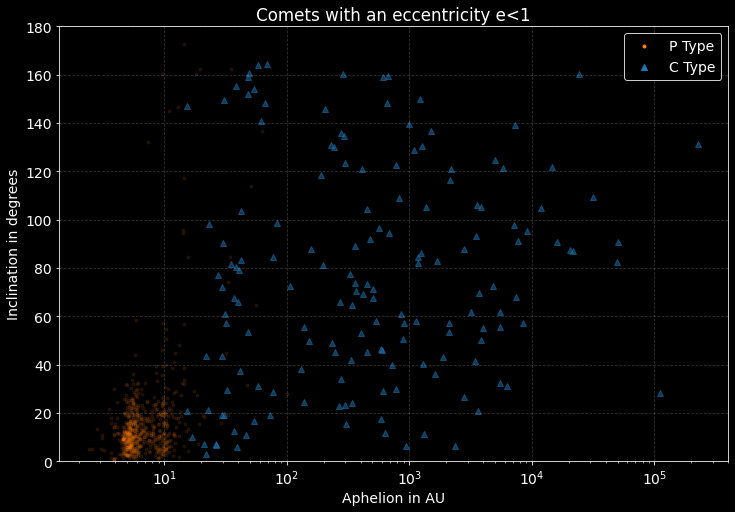

In [4]:
# We plot the Inclination data vs. the aphelion data to determine differences
# between P and C comets

# Let's set a dark background
plt.style.use('dark_background')

# Set a default font size for better readability
plt.rcParams.update({'font.size': 14})

# Set a figure with a certain figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot of the P type comet inclination vs. the aphelion
ax.scatter(P_TYPE_DF['APHELION_AU'], \
           P_TYPE_DF['INCLINATION_DEG'], \
           marker='.', color='tab:orange', alpha=0.1, label='P Type')

# Scatter plot of the C type comet inclination vs. the aphelion (consider
# only the bound orbits!)
ax.scatter(C_TYPE_DF[C_TYPE_DF['ECCENTRICITY'] < 1]['APHELION_AU'], \
           C_TYPE_DF[C_TYPE_DF['ECCENTRICITY'] < 1]['INCLINATION_DEG'], \
           marker='^', color='tab:blue', alpha=0.5, label='C Type')

# The aphelion data vary between a few AU and hundreds of AU. We convert the
# x scale to a log10 scale
ax.set_xscale('log')

# Set a limit for the inclination; between 0 and 180 degrees
ax.set_ylim(0, 180)

# Set a grid for better readability
ax.grid(axis='both', linestyle='dashed', alpha=0.2)

# Set a title, and labels for the x and y axis
ax.set_title('Comets with an eccentricity e<1')
ax.set_xlabel('Aphelion in AU')
ax.set_ylabel('Inclination in degrees')

# Now we set a legend. However, the marker opacity in the legend has the
# same value as in the plot. A value of 0.1 would be difficult to see ...
leg = ax.legend(fancybox=True, loc='upper right', framealpha=1)

# ... thus, we set the markers' opacity to 1 with this small code
for lh in leg.legendHandles:
    lh.set_alpha(1)

# Save the plot in high quality
plt.savefig('comets_scatter_plot_Q_i.png', dpi=300)

In [5]:
# It appears that the aphelion and inclination values of the C comets are more
# dispersed than the P comet values. P comets are more "concentrated" in the
# inner part of the Solar System. Since we will have a closer look on P comets
# another time, let's have a look at the inclination distribution of the
# comets.
#
# "From which direction do they come from" (w.r.t. ECLIPJ2000)?

# We analyse the complete inclination definition range. So let's set an array
# that covers 0 to 180 degrees
INCL_RANGE = np.linspace(0, 180, 1000)

# Two plots will be created. First: a histogram. A rule-of-thumb is defined in
# this lambda function: the floor value of the square-root of the total number
# of observations is used
nr_of_bins = lambda data_array: int(np.floor(np.sqrt(len(data_array))))

In [6]:
# Second: To derive a continuous distribution a Kernel-Density Estimator (KDE)
# is used. We apply the standard settings. Import the scipy module first
from scipy import stats

# Kernel and distribution computation for the P type comets
P_TYPE_INC_KERNEL = stats.gaussian_kde(P_TYPE_DF['INCLINATION_DEG'])
P_TYPE_INC_DISTR = P_TYPE_INC_KERNEL(INCL_RANGE)

# Kernel and distribution computation for the C type comets
C_TYPE_INC_KERNEL = stats.gaussian_kde(C_TYPE_DF['INCLINATION_DEG'])
C_TYPE_INC_DISTR = C_TYPE_INC_KERNEL(INCL_RANGE)

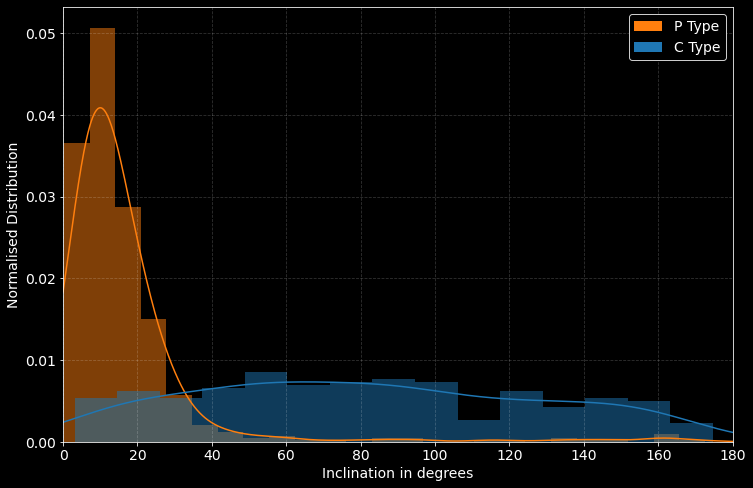

In [7]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Histogram of the P and C type comets' inclination.
ax.hist(P_TYPE_DF['INCLINATION_DEG'], \
        bins=nr_of_bins(P_TYPE_DF['INCLINATION_DEG']), \
        density=True, color='tab:orange', alpha=0.5, label='P Type')

ax.hist(C_TYPE_DF['INCLINATION_DEG'], \
        bins=nr_of_bins(C_TYPE_DF['INCLINATION_DEG']), \
        density=True, color='tab:blue', alpha=0.5, label='C Type')

# Plot the KDE of the P type comets
ax.plot(INCL_RANGE, P_TYPE_INC_DISTR, color='tab:orange', alpha=1, linestyle='solid')

# Plot the KDE of the C type comets
ax.plot(INCL_RANGE, C_TYPE_INC_DISTR, color='tab:blue', alpha=1, linestyle='solid')

# Set an x axis limits (inclination range)
ax.set_xlim(0, 180)

# Add a grid for better readability
ax.grid(axis='both', linestyle='dashed', alpha=0.2)

# Set an x and y label
ax.set_xlabel('Inclination in degrees')
ax.set_ylabel('Normalised Distribution')

# Again: We re-define the opacity (alpha value) of the markers / lines in the
# legend for better visibility
leg = ax.legend(fancybox=True, loc='upper right', framealpha=1)
for lh in leg.legendHandles:
    lh.set_alpha(1)

# Save the figure
plt.savefig('comets_kde_incl_.png', dpi=300)